In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# import stats libraries
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# import linear regression to use with RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# we will be using min max scaler for scaling numerical variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

# evaluation related imports
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
#Importing dataset
boombikes  = pd.read_csv('day.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# drop the instant column since it is just index
boombikes.drop('instant', axis=1, inplace=True)

In [6]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [7]:
boombikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# inspect null values
boombikes.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
boombikes.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [10]:
boombikes.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [11]:
boombikes.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [12]:
boombikes.hum.value_counts()

61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64

In [13]:
boombikes.temp.value_counts()

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64

In [14]:
boombikes.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [15]:
boombikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

### Numerical variables
- temp
- atemp
- windspeed
- hum

### Categorical variables
- workingday - binary
- weathersit - categorical
- weekday-  categorical
- season - categorical
- months - categorical
- holiday -binary

In [16]:
# convert dteday to datetime
boombikes.head()
boombikes['dteday'] = pd.to_datetime(boombikes['dteday'])

boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
# convert categorical variables to object types
boombikes = boombikes.astype({
                 'weathersit' :object,
                 'weekday':object, 
                 'season' :object,
                 'mnth':object
               })

### Visualising numerical variables

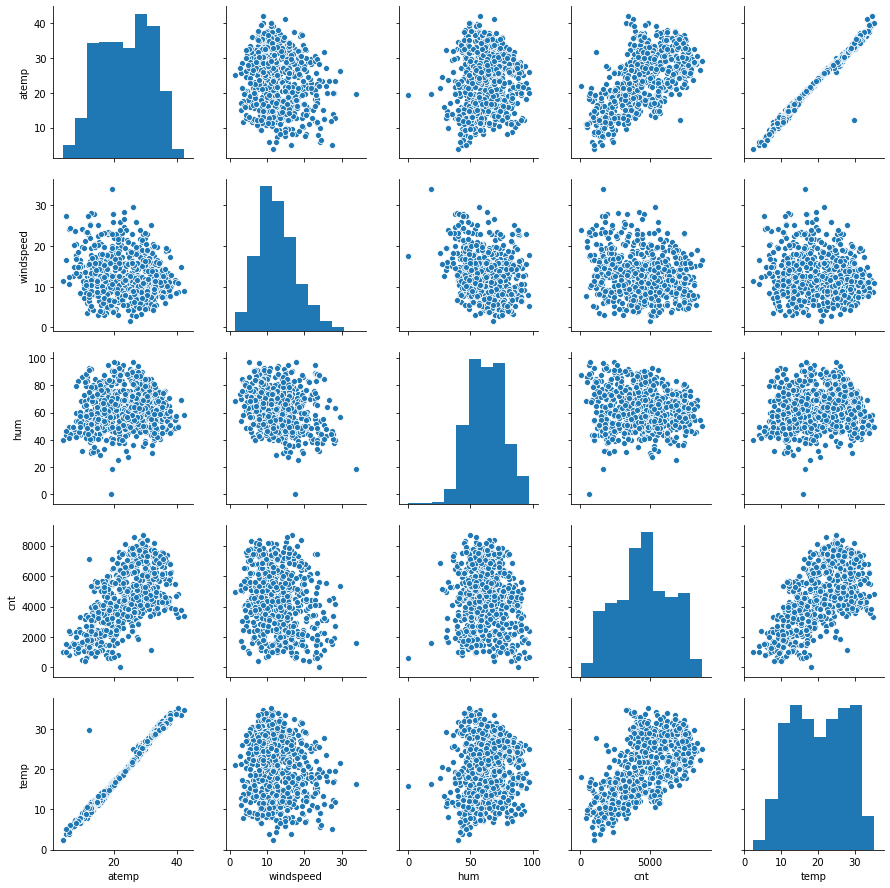

In [18]:
numerical_variables= ['atemp','windspeed','hum',  'cnt','temp']
sns.pairplot(boombikes[numerical_variables])
plt.show()

### Observation
- All the four numeric variables(temp, atemp, windspeed, hum) seem to have some sort of linear relation ship with the cnt.
- Variance however is visibly different. High for windspeed and less for temp

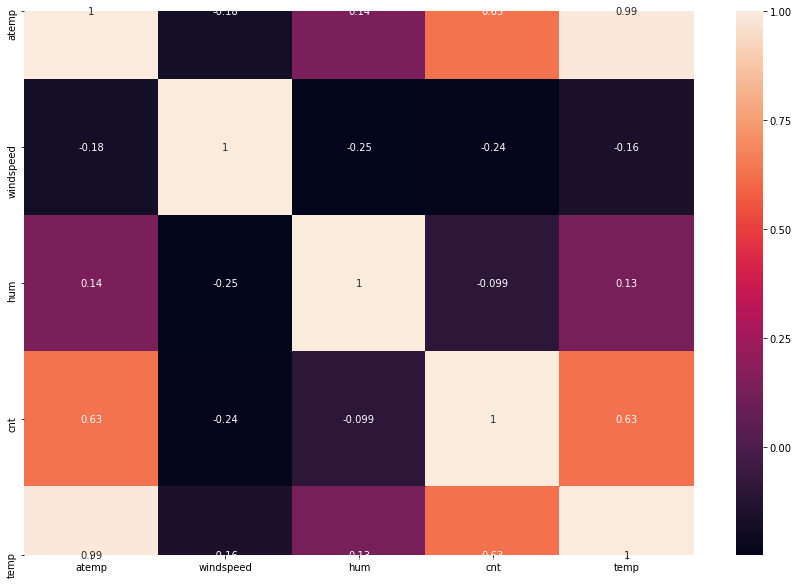

In [19]:
# looking at correlation of selected columns
plt.figure(figsize = (15,10))        
sns.heatmap(boombikes[numerical_variables].corr(),annot = True)

### Observation
- atemp and temp are highly corrlated 
- temp , atemp are highly correlated with the target variable **cnt**

### Time Series Data

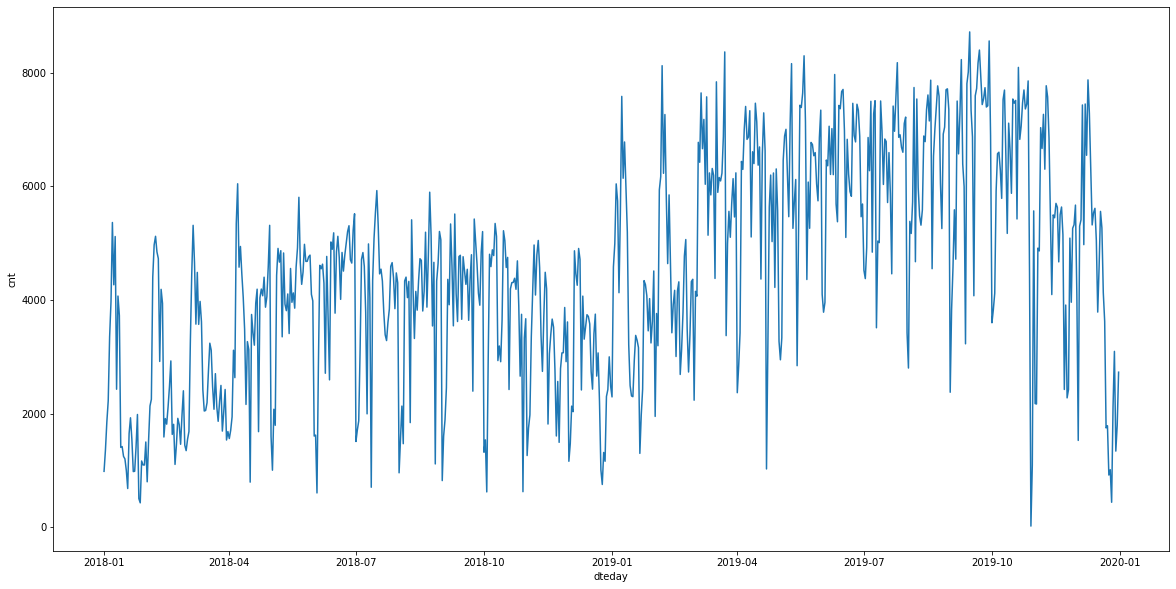

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(x='dteday', y='cnt', data=boombikes)

## Plotting categorical variables

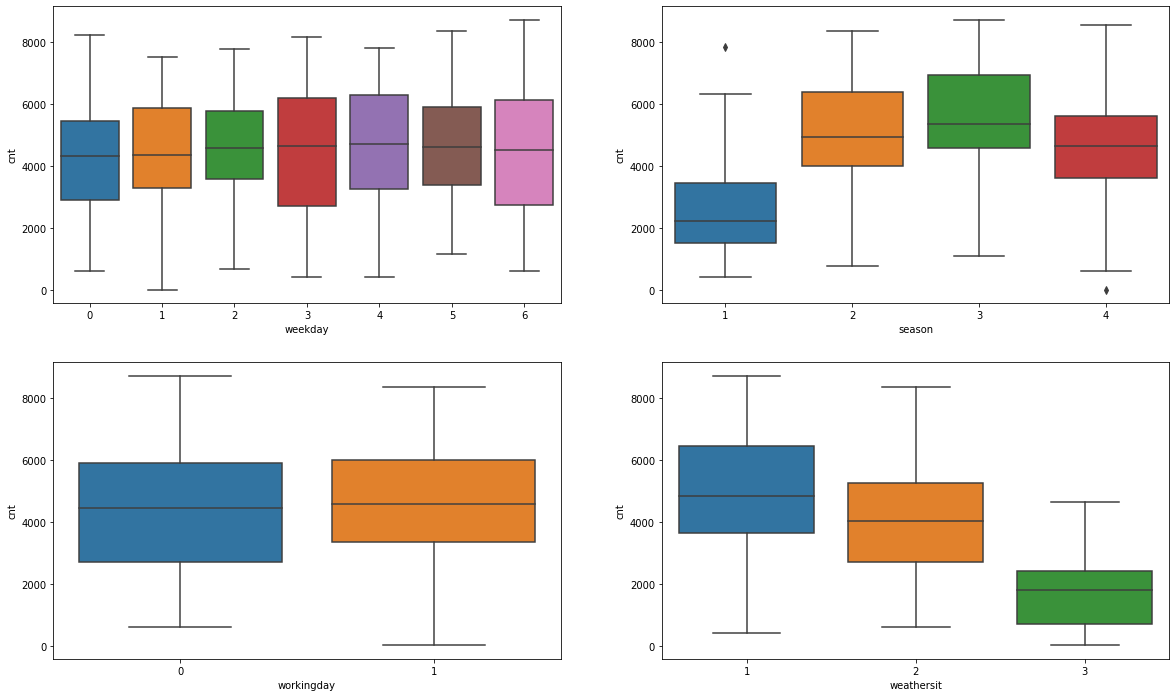

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)
plt.subplot(2,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(2,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.show()

### Observation 
- No significant ouliers in categorical variables except for some on season variable

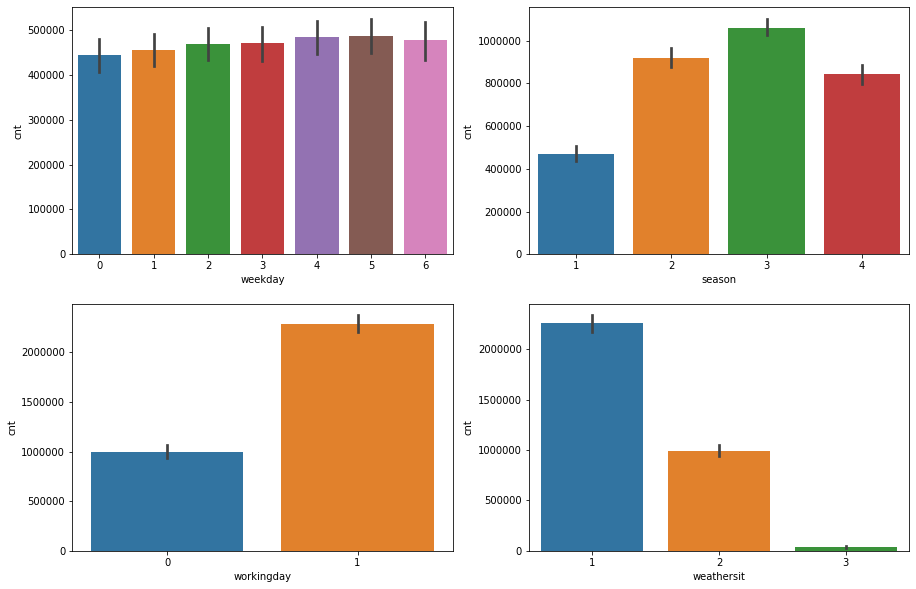

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(x='weekday', y='cnt', data=boombikes, estimator=sum)

plt.subplot(222)
sns.barplot(x='season', y='cnt', data=boombikes, estimator=sum)

plt.subplot(223)
sns.barplot(x='workingday', y='cnt', data=boombikes, estimator=sum)

plt.subplot(224)
sns.barplot(x='weathersit', y='cnt', data=boombikes, estimator=sum)

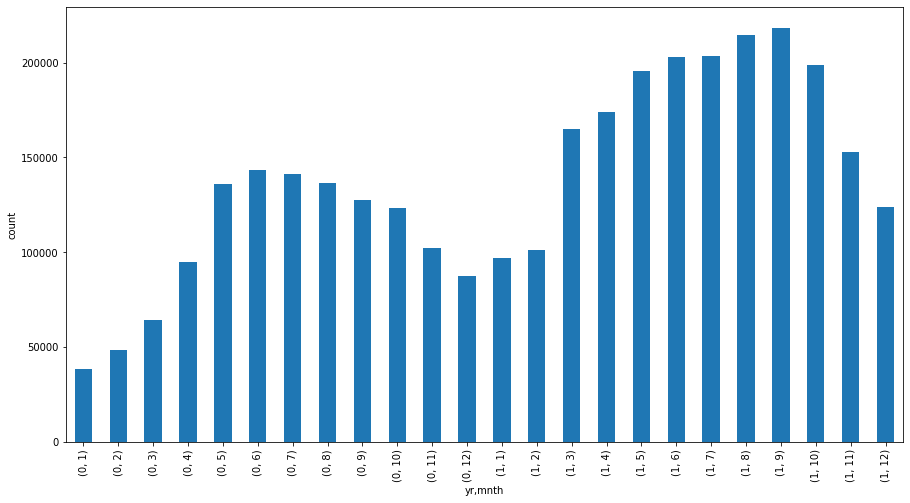

In [23]:
# figure 3
plt.figure(figsize=(15,8))
plt.ylabel('count')
boombikes.groupby(by=[ 'yr', 'mnth'])['cnt'].sum().plot.bar()

### Observation for all of above plots for categorical variables
- During Fall (season), highest number of bookings are recorded.
- Bookings are very high on working days then on non-working days. People prefer to use bike service for travelling to work.
- People are more likely to use bike service on a clear or partly cloudly day. and hardly use the service during snow season. 
- from figure 3 it is clear that over the two years the demand for bikes has increased
- this also confirms that during winters i.e. months january ,feb, november, december demand decreases significantly

In [24]:
# drop the date column since we are not looking at time series data
boombikes.drop('dteday', axis=1, inplace=True)
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [25]:
#drop casual and registered columns
boombikes.drop(['casual', 'registered'], axis=1, inplace=True)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
boombikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

### Handling outliers

In [27]:
boombikes.loc[(boombikes.season==1) & (boombikes.cnt>6000)].cnt.describe()

count       5.000000
mean     6517.200000
std       741.566383
min      6093.000000
25%      6153.000000
50%      6192.000000
75%      6312.000000
max      7836.000000
Name: cnt, dtype: float64

In [28]:
boombikes = boombikes.loc[~((boombikes.season==1) & (boombikes.cnt>6000))]

In [29]:
boombikes[(boombikes.season==4) & (boombikes.cnt<100) ].cnt.describe()

count     1.0
mean     22.0
std       NaN
min      22.0
25%      22.0
50%      22.0
75%      22.0
max      22.0
Name: cnt, dtype: float64

In [30]:
boombikes = boombikes[~((boombikes.season==4) & (boombikes.cnt<100))]

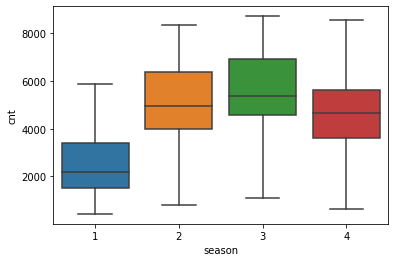

In [31]:
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)

## Handling categorical data.
- Using data dictonary where applicable 
- Convert to dummies

In [32]:
# map season to strings. 
boombikes.season = boombikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boombikes.season.value_counts()

fall      188
summer    184
winter    177
spring    175
Name: season, dtype: int64

In [33]:
# convert seasons to dummies
seasons = pd.get_dummies(boombikes['season'], prefix='season', drop_first=True)
boombikes = pd.concat([boombikes, seasons], axis=1)
boombikes.drop('season', axis=1, inplace=True)
boombikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [34]:
#convert months to dummies
months = pd.get_dummies(boombikes['mnth'], prefix='month', drop_first=True)
boombikes = pd.concat([boombikes, months], axis=1)
boombikes.drop('mnth', axis=1, inplace=True)
boombikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [35]:
boombikes.weathersit.value_counts()

1    459
2    245
3     20
Name: weathersit, dtype: int64

In [36]:
#convert weathersit to dummies
weathersit = pd.get_dummies(boombikes['weathersit'], prefix='weathersit', drop_first=True)
boombikes = pd.concat([boombikes, weathersit], axis=1)
boombikes.drop('weathersit', axis=1, inplace=True)
boombikes.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weathersit_2,weathersit_3
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
boombikes.weekday.value_counts()

0    105
6    104
5    104
4    103
2    103
1    103
3    102
Name: weekday, dtype: int64

In [38]:
#convert weekday to dummies

weekday = pd.get_dummies(boombikes['weekday'], prefix='weekday', drop_first=True)
boombikes = pd.concat([boombikes, weekday], axis=1)
boombikes.drop('weekday', axis=1, inplace=True)
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,month_11,month_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 729
Data columns (total 30 columns):
yr               724 non-null int64
holiday          724 non-null int64
workingday       724 non-null int64
temp             724 non-null float64
atemp            724 non-null float64
hum              724 non-null float64
windspeed        724 non-null float64
cnt              724 non-null int64
season_spring    724 non-null uint8
season_summer    724 non-null uint8
season_winter    724 non-null uint8
month_2          724 non-null uint8
month_3          724 non-null uint8
month_4          724 non-null uint8
month_5          724 non-null uint8
month_6          724 non-null uint8
month_7          724 non-null uint8
month_8          724 non-null uint8
month_9          724 non-null uint8
month_10         724 non-null uint8
month_11         724 non-null uint8
month_12         724 non-null uint8
weathersit_2     724 non-null uint8
weathersit_3     724 non-null uint8
weekday_1        724 no

In [40]:
# split the data in 70/30 ration , we also specify randomstate so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the numerical variables on train data set

In [41]:
# initialize the scaler
scaler = StandardScaler()

#### We do not scale the target variable

In [42]:
num_vars = ['temp','atemp','windspeed','hum']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,month_11,month_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
418,1,0,1,-0.197518,-0.154376,-0.542178,-0.006279,5062,1,0,...,0,0,0,0,0,0,0,1,0,0
728,1,0,0,-1.284108,-1.462196,-1.045359,2.030441,1796,1,0,...,0,1,0,0,0,0,0,0,0,0
614,1,0,1,1.167558,1.153519,0.740788,-0.251783,7504,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,-0.841252,-0.907375,0.693705,0.358248,1683,0,1,...,0,0,1,0,0,0,0,0,1,0
579,1,0,1,1.509970,1.557171,0.078708,0.310733,7175,0,0,...,0,0,1,0,0,0,0,0,1,0


In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model using RFE.

- We are using the **LinearRegression function from SciKit Learn** for its compatibility with RFE.
- We start with 15 variables

In [44]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [45]:
# visualize the selected columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 4),
 ('windspeed', False, 5),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('month_2', False, 6),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', False, 15),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 11),
 ('month_12', False, 12),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('weekday_1', False, 7),
 ('weekday_2', False, 14),
 ('weekday_3', False, 10),
 ('weekday_4', False, 13),
 ('weekday_5', False, 9),
 ('weekday_6', False, 2)]

In [46]:
# select the columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'season_spring', 'season_winter',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_8', 'month_9',
       'month_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [47]:
# lets observe intercept and cofficients derived by RFE
print(lm.intercept_)
print(lm.coef_)

3026.790591361056
[ 2083.64292487  -351.06724779   264.93041051   572.95536408
   311.75611857  -249.89106356  -209.24859236  -668.5962848
   150.62809462   834.71009118   164.38701659   409.11165506
   490.58082301   794.11592275   402.34986671    25.73855954
   409.28822253   996.08465736   586.44418521  -122.90035565
   -65.41227116  -461.4417095  -1777.03583765  -146.76248254
   -31.79017046    52.69226801   -44.28199395    84.00554166
   300.79466537]


In [48]:
## column value and calculated coeeff vallue.
list(zip(col,lm.coef_))

[('yr', 2083.642924869246),
 ('holiday', -351.0672477923001),
 ('temp', 264.9304105072362),
 ('atemp', 572.9553640785465),
 ('season_spring', 311.75611856517577),
 ('season_winter', -249.89106356241317),
 ('month_3', -209.24859235866347),
 ('month_4', -668.5962847990055),
 ('month_5', 150.6280946151096),
 ('month_6', 834.7100911768729),
 ('month_8', 164.38701658927764),
 ('month_9', 409.1116550610214),
 ('month_10', 490.58082301145004),
 ('weathersit_2', 794.1159227475376),
 ('weathersit_3', 402.34986671234384)]

### Observation
- The coefficient values are very high since we have not scaled the target variable. If we scale the target variable coefficient values adjust accordingly. 

### Build the model using statsmodel with the columns selected by rfe for detailed statistics

In [49]:
# create subset from training set using columns selected by RFE
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,atemp,season_spring,season_winter,month_3,month_4,month_5,month_6,month_8,month_9,month_10,weathersit_2,weathersit_3
418,1,0,-0.197518,-0.154376,1,0,0,0,0,0,0,0,0,0,0
728,1,0,-1.284108,-1.462196,1,0,0,0,0,0,0,0,0,0,0
614,1,0,1.167558,1.153519,0,0,0,0,0,0,0,1,0,0,0
111,0,0,-0.841252,-0.907375,0,0,0,1,0,0,0,0,0,1,0
579,1,0,1.509970,1.557171,0,0,0,0,0,0,1,0,0,1,0


In [50]:
## calculate VIF for these columns

### we have created a function that accepts and drops the specified column and than calculates the vif.
### going forward we will create a new dataframe for running model. x_train_rfe reflects selected columns and calculates VIF
def calculateVIF(excludeColumn=""):
    if(excludeColumn!=""):
        X_train_rfe.drop(excludeColumn, axis=1, inplace=True)
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

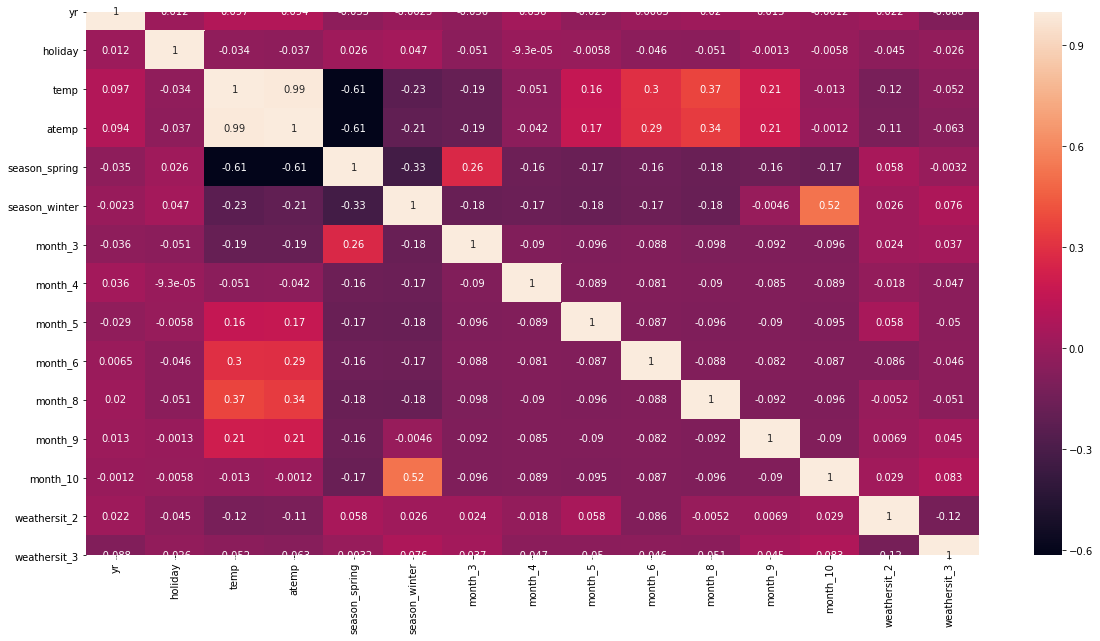

In [51]:
# looking at correlation of selected columns
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train_rfe.corr(),annot = True)

In [52]:
# Adding a constant variable for intercept
X_train_rfe_const = sm.add_constant(X_train_rfe)

In [53]:
lm = sm.OLS(y_train,X_train_rfe_const).fit()  #fit model

In [54]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.05e-184
Time:                        20:09:38   Log-Likelihood:                -4092.0
No. Observations:                 506   AIC:                             8216.
Df Residuals:                     490   BIC:                             8284.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3486.8621    124.158     28.084

In [55]:
## calculate VIF for these columns
calculateVIF()

,Features,VIF
2,temp,56.05
3,atemp,52.05
4,season_spring,2.50
5,season_winter,2.41
0,yr,1.93
12,month_10,1.64
13,weathersit_2,1.58
10,month_8,1.45
9,month_6,1.26
11,month_9,1.25


#### Observation
- we obeserve that temp, atemp have high VIF value. 
- temp, atemp, holiday, month_3,month_4,month_6 ,month_8 have high pvalues

#### Adjusted R-squared = 0.836 
#### Prob (F-statistic):  21.05e-184


In [56]:
## remove temp as it has highest vif
X_train_rfe_const = X_train_rfe_const.drop('temp', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.86e-185
Time:                        20:09:38   Log-Likelihood:                -4092.9
No. Observations:                 506   AIC:                             8216.
Df Residuals:                     491   BIC:                             8279.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3508.4338    123.217     28.474      0.000    3266.337    3750.531
yr             2137.4664     72.067     29.659      0.000    1995.868    2279.065
holiday        -652.9642    226.672     -2.881      0.004   -1098.331    -207.597
atemp           787.4486     63.252     12.449      0.000     663.171     911.726
season_spring  -879.7201    166.633     -5.279      0.000   -1207.122    -552.319
season_winter   517.6334    154.179      3.357      0.001     214.700     820.566
month_3         352.8824    138.412      2.550      0.011      80.930     624.835
month_4         402.2134    175.596      2.291      0.022      57.201     747.225
month_5         740.4554    161.051      4.598      0.000     424.021    1056.890
month_6         479.2120    169.313      2.830      0.005     146.546     811.878
month_8         417.0385    160.548      2.598      0.010     101.592     732.485
month_9         931.0943    152.972      6.087      0.000     630.533    1231.656
month_10        678.4755    154.132      4.402      0.000     375.635     981.316
weathersit_2   -736.7634     75.790     -9.721      0.000    -885.676    -587.851
weathersit_3  -2241.2713    230.530     -9.722      0.000   -2694.218   -1788.325
==============================================================================
Omnibus:                       92.786   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.727
Skew:                          -0.915   Prob(JB):                     1.45e-52
Kurtosis:                       5.824   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
## calculate VIF for these columns
calculateVIF('temp')

,Features,VIF
2,atemp,2.71
3,season_spring,2.43
4,season_winter,2.29
0,yr,1.91
11,month_10,1.63
12,weathersit_2,1.58
9,month_8,1.35
8,month_6,1.24
10,month_9,1.23
5,month_3,1.18


### Observation
- VIF values have decreased considerably for most of the variables.  
- Except **month_3**,**month_4**, **month_8**,  **month_6**, **holiday**, Pvalues are already 0. 
- r2 and adjusted r2 have not changed very significantly. 

In [58]:
## remove month_4 as it has high p value
X_train_rfe_const = X_train_rfe_const.drop('month_4', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.75e-185
Time:                        20:09:38   Log-Likelihood:                -4095.6
No. Observations:                 506   AIC:                             8219.
Df Residuals:                     492   BIC:                             8278.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3685.8091     96.255     38.292      0.000    3496.687    3874.931
yr             2144.9267     72.304     29.665      0.000    2002.864    2286.989
holiday        -655.4805    227.646     -2.879      0.004   -1102.758    -208.203
atemp           739.4876     59.942     12.337      0.000     621.713     857.262
season_spring -1094.1110    138.456     -7.902      0.000   -1366.149    -822.073
season_winter   324.0641    129.512      2.502      0.013      69.599     578.529
month_3         274.4803    134.690      2.038      0.042       9.841     539.120
month_5         587.1672    147.120      3.991      0.000     298.107     876.227
month_6         347.9216    160.001      2.174      0.030      33.551     662.292
month_8         288.7361    151.108      1.911      0.057      -8.161     585.633
month_9         834.1303    147.632      5.650      0.000     544.064    1124.196
month_10        693.7889    154.650      4.486      0.000     389.932     997.645
weathersit_2   -738.1323     76.114     -9.698      0.000    -887.680    -588.584
weathersit_3  -2276.7856    230.998     -9.856      0.000   -2730.650   -1822.921
==============================================================================
Omnibus:                       96.741   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.981
Skew:                          -0.954   Prob(JB):                     1.42e-54
Kurtosis:                       5.850   Cond. No.                         8.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
## calculate VIF for these columns
calculateVIF('month_4')

,Features,VIF
2,atemp,2.66
3,season_spring,2.34
4,season_winter,2.22
0,yr,1.76
10,month_10,1.63
11,weathersit_2,1.54
8,month_8,1.35
7,month_6,1.24
9,month_9,1.23
5,month_3,1.18


### Observation
- VIF values are see some improvement. 
- p-value of month_8 increased significantly

In [60]:
## remove month_8 as high p value
X_train_rfe_const = X_train_rfe_const.drop('month_8', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.18e-186
Time:                        20:09:38   Log-Likelihood:                -4097.5
No. Observations:                 506   AIC:                             8221.
Df Residuals:                     493   BIC:                             8276.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3758.1044     88.745     42.347      0.000    3583.739    3932.470
yr             2139.6505     72.445     29.535      0.000    1997.311    2281.990
holiday        -677.9321    227.953     -2.974      0.003   -1125.811    -230.053
atemp           771.3315     57.734     13.360      0.000     657.897     884.766
season_spring -1123.3422    137.978     -8.141      0.000   -1394.439    -852.245
season_winter   279.3052    127.718      2.187      0.029      28.366     530.244
month_3         238.0416    133.692      1.781      0.076     -24.634     500.717
month_5         496.3194    139.599      3.555      0.000     222.037     770.602
month_6         243.6457    150.811      1.616      0.107     -52.666     539.957
month_9         751.3660    141.513      5.310      0.000     473.322    1029.410
month_10        666.6806    154.412      4.318      0.000     363.294     970.067
weathersit_2   -730.0629     76.201     -9.581      0.000    -879.781    -580.345
weathersit_3  -2283.4641    231.592     -9.860      0.000   -2738.493   -1828.435
==============================================================================
Omnibus:                       93.284   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.894
Skew:                          -0.932   Prob(JB):                     4.41e-51
Kurtosis:                       5.743   Cond. No.                         8.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
calculateVIF('month_8')

,Features,VIF
3,season_spring,2.28
2,atemp,2.21
4,season_winter,2.21
0,yr,1.73
9,month_10,1.61
10,weathersit_2,1.50
5,month_3,1.18
7,month_6,1.18
8,month_9,1.18
6,month_5,1.13


### Observation
- p-values for month_3 and month_6 have increased suddenly
- VIF values show sligh improvement on the top of table

In [62]:
## remove month_6 as high p value
X_train_rfe_const = X_train_rfe_const.drop('month_6', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.69e-186
Time:                        20:09:38   Log-Likelihood:                -4098.8
No. Observations:                 506   AIC:                             8222.
Df Residuals:                     494   BIC:                             8272.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3801.6798     84.685     44.892      0.000    3635.293    3968.066
yr             2136.1977     72.531     29.452      0.000    1993.690    2278.706
holiday        -691.2556    228.174     -3.030      0.003   -1139.568    -242.944
atemp           785.6736     57.140     13.750      0.000     673.406     897.941
season_spring -1142.6441    137.683     -8.299      0.000   -1413.161    -872.127
season_winter   252.6801    126.857      1.992      0.047       3.435     501.925
month_3         218.2825    133.348      1.637      0.102     -43.716     480.281
month_5         448.6848    136.672      3.283      0.001     180.155     717.215
month_9         708.6663    139.250      5.089      0.000     435.071     982.261
month_10        654.2336    154.471      4.235      0.000     350.733     957.734
weathersit_2   -734.6439     76.272     -9.632      0.000    -884.501    -584.787
weathersit_3  -2291.4332    231.916     -9.880      0.000   -2747.097   -1835.769
==============================================================================
Omnibus:                       90.945   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.271
Skew:                          -0.919   Prob(JB):                     1.47e-48
Kurtosis:                       5.659   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
calculateVIF('month_6')

,Features,VIF
3,season_spring,2.25
4,season_winter,2.20
2,atemp,2.00
0,yr,1.71
8,month_10,1.60
9,weathersit_2,1.49
5,month_3,1.18
7,month_9,1.16
6,month_5,1.12
10,weathersit_3,1.05


In [64]:
## remove month_3 as high p value
X_train_rfe_const = X_train_rfe_const.drop('month_3', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     252.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.92e-187
Time:                        20:09:38   Log-Likelihood:                -4100.2
No. Observations:                 506   AIC:                             8222.
Df Residuals:                     495   BIC:                             8269.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3829.5260     83.099     46.084      0.000    3666.255    3992.797
yr             2133.9350     72.641     29.376      0.000    1991.212    2276.658
holiday        -709.5355    228.287     -3.108      0.002   -1158.067    -261.004
atemp           776.3559     56.952     13.632      0.000     664.458     888.254
season_spring -1131.6321    137.752     -8.215      0.000   -1402.283    -860.981
season_winter   222.0453    125.681      1.767      0.078     -24.889     468.980
month_5         426.4729    136.227      3.131      0.002     158.818     694.128
month_9         695.0203    139.236      4.992      0.000     421.454     968.586
month_10        656.5409    154.726      4.243      0.000     352.540     960.541
weathersit_2   -732.4087     76.389     -9.588      0.000    -882.495    -582.322
weathersit_3  -2275.6391    232.108     -9.804      0.000   -2731.678   -1819.600
==============================================================================
Omnibus:                       90.205   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.685
Skew:                          -0.907   Prob(JB):                     7.27e-49
Kurtosis:                       5.688   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
calculateVIF('month_3')

,Features,VIF
4,season_winter,2.20
3,season_spring,2.14
2,atemp,2.00
0,yr,1.70
7,month_10,1.60
8,weathersit_2,1.48
6,month_9,1.16
5,month_5,1.12
9,weathersit_3,1.05
1,holiday,1.03


### Observation 
- After removing month_6 and mont_3 pvalue for season_winter has increased a lot. 

In [66]:
# ## remove month_4 as it has high p values
X_train_rfe_const = X_train_rfe_const.drop('season_winter', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     278.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.08e-187
Time:                        20:09:38   Log-Likelihood:                -4101.8
No. Observations:                 506   AIC:                             8224.
Df Residuals:                     496   BIC:                             8266.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3909.9233     69.680     56.112      0.000    3773.018    4046.828
yr             2138.8104     72.744     29.402      0.000    1995.886    2281.734
holiday        -682.7719    228.271     -2.991      0.003   -1131.269    -234.275
atemp           719.9125     47.248     15.237      0.000     627.081     812.744
season_spring -1276.6198    110.875    -11.514      0.000   -1494.462   -1058.777
month_5         375.1973    133.384      2.813      0.005     113.130     637.265
month_9         706.8362    139.372      5.072      0.000     433.004     980.669
month_10        795.3842    133.567      5.955      0.000     532.958    1057.811
weathersit_2   -733.3057     76.550     -9.579      0.000    -883.709    -582.903
weathersit_3  -2277.0597    232.603     -9.789      0.000   -2734.068   -1820.051
==============================================================================
Omnibus:                       89.320   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.955
Skew:                          -0.913   Prob(JB):                     1.55e-46
Kurtosis:                       5.584   Cond. No.                         8.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
## calculate VIF for these columns
calculateVIF('season_winter')

,Features,VIF
3,season_spring,1.82
2,atemp,1.64
0,yr,1.49
7,weathersit_2,1.42
5,month_9,1.13
4,month_5,1.12
6,month_10,1.11
8,weathersit_3,1.04
1,holiday,1.02


### Observation
- VIF values are now <2 for all variables
- Month_3 is still insignifact with high pvalue


In [68]:
## remove month_3 as high p value
X_train_rfe_const = X_train_rfe_const.drop('month_5', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     308.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.98e-187
Time:                        20:09:38   Log-Likelihood:                -4105.8
No. Observations:                 506   AIC:                             8230.
Df Residuals:                     497   BIC:                             8268.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3959.2866     67.902     58.309      0.000    3825.877    4092.696
yr             2128.7297     73.159     29.097      0.000    1984.991    2272.469
holiday        -679.0145    229.849     -2.954      0.003   -1130.610    -227.419
atemp           732.8493     47.350     15.477      0.000     639.819     825.880
season_spring -1314.5928    110.813    -11.863      0.000   -1532.312   -1096.873
month_9         647.2324    138.707      4.666      0.000     374.709     919.756
month_10        744.2338    133.240      5.586      0.000     482.450    1006.017
weathersit_2   -714.6568     76.791     -9.306      0.000    -865.532    -563.781
weathersit_3  -2289.3220    234.174     -9.776      0.000   -2749.414   -1829.230
==============================================================================
Omnibus:                       85.382   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.434
Skew:                          -0.899   Prob(JB):                     1.21e-41
Kurtosis:                       5.388   Cond. No.                         8.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
calculateVIF('month_5')

,Features,VIF
3,season_spring,1.82
2,atemp,1.60
0,yr,1.48
6,weathersit_2,1.36
4,month_9,1.12
5,month_10,1.10
7,weathersit_3,1.04
1,holiday,1.02


### Observations
- After removing the columns with high p values model still exhibits adjusted rsqaured of .832
- All the variables in the model are now significant.

- We also note that all the variables are in line with our initial observation of the data. 

- Very High Negative coeffecient for weathersit_3 confirms that **Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds** lead to decrease in the bookings.

- Relatively high negative coeffecient for weathersit_2 confirms that **Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist** lead to decrease in bookings. This is in line with general expectations on use of bikes in such weather

- We had observed that count of bookings in **spring<winter<summer<fall**. negative coefficient of season_spring and +ve and not so big coefficient of season_winter confirms this pattern. 

- We had observed that working days see more bookings than holidays. negative coefficient of holiday confirm this. 

In [70]:
# lets try removing the yr variable
## remove month_3 as high p value
X_train_rfe_const_yr = X_train_rfe_const.drop('yr', axis=1)
lm_yr = sm.OLS(y_train,X_train_rfe_const_yr ).fit() 
lm_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     85.78
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.91e-81
Time:                        20:09:39   Log-Likelihood:                -4357.4
No. Observations:                 506   AIC:                             8731.
Df Residuals:                     498   BIC:                             8765.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4996.1506     94.941     52.624      0.000    4809.616    5182.685
holiday        -584.0288    377.509     -1.547      0.122   -1325.736     157.678
atemp           853.1050     77.479     11.011      0.000     700.878    1005.332
season_spring -1227.9410    181.954     -6.749      0.000   -1585.433    -870.449
month_9         648.7951    227.838      2.848      0.005     201.153    1096.437
month_10        785.3566    218.847      3.589      0.000     355.380    1215.333
weathersit_2   -663.9869    126.104     -5.265      0.000    -911.748    -416.225
weathersit_3  -2817.8363    383.492     -7.348      0.000   -3571.299   -2064.374
==============================================================================
Omnibus:                       42.057   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.088
Skew:                           0.038   Prob(JB):                     0.000873
Kurtosis:                       2.186   Cond. No.                         7.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
- we observe that model accuracy falls sharply if we remove the yr variable. hece we shoul keewp it for now

In [71]:
# lets predict the values on training set using our model
y_train_pred = lm.predict(X_train_rfe_const)

Text(0, 0.5, 'Cnt')

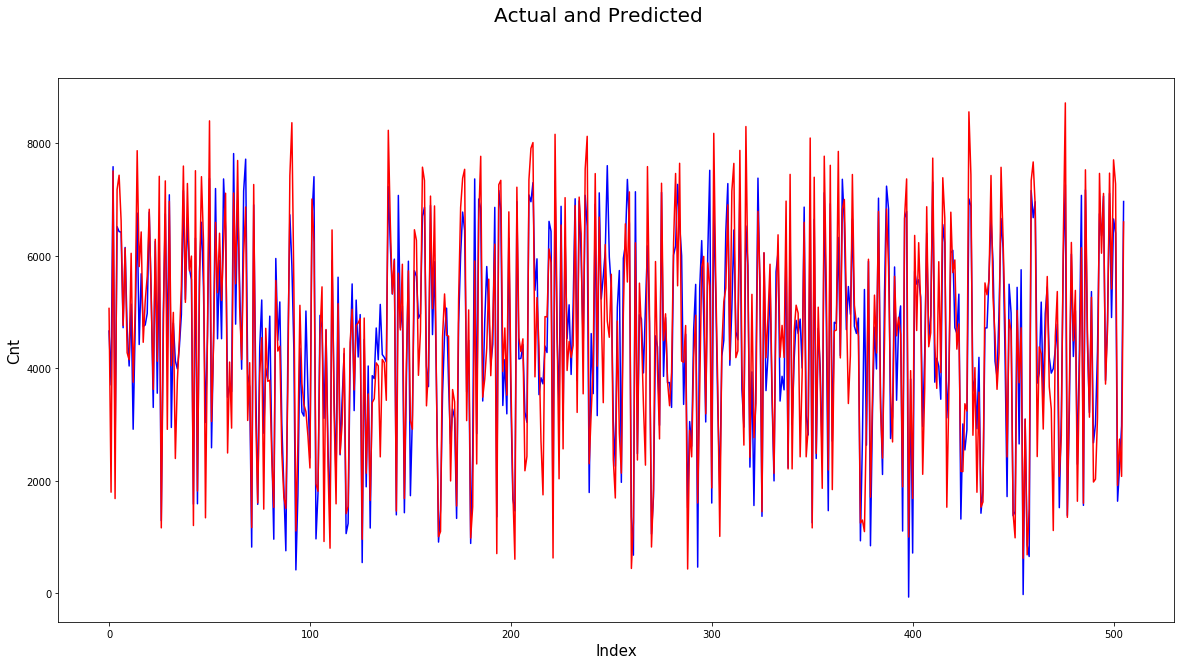

In [72]:
#Actual vs Predicted for first 100 values for clear visibility
c = [i for i in range(len(y_train.index))]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_train_pred, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_train, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=15)                               # X-label
plt.ylabel('Cnt', fontsize=15)

Text(0, 0.5, 'Cnt')

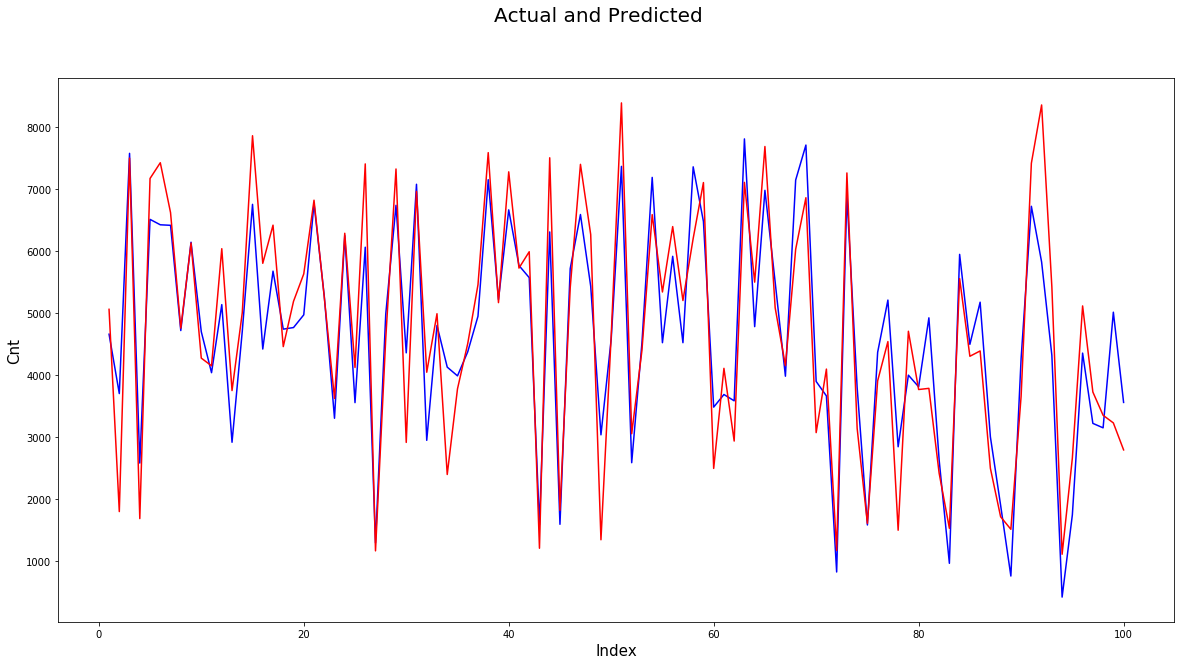

In [73]:
#Actual vs Predicted for first 100 values for clear visibility
c = [i for i in range(1,101)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_train_pred[:100], color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_train[:100], color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=15)                               # X-label
plt.ylabel('Cnt', fontsize=15)

## Calculating rsquared and mean_squared_error

In [74]:
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

In [75]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 653732.3593159796
r_square_value : 0.8323048342230155


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

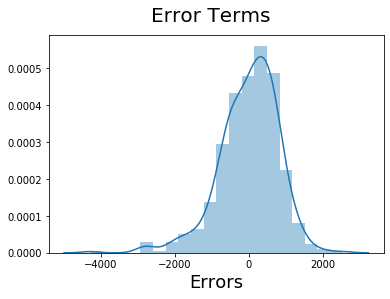

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

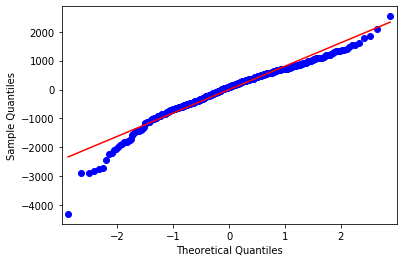

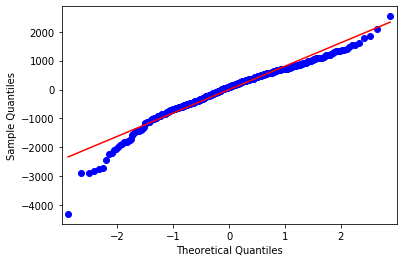

In [77]:
## visualize residuals using qqplot.
qqplot(lm.resid, line='s')

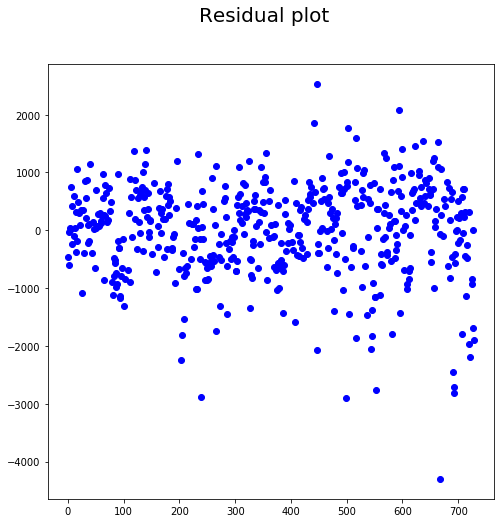

In [78]:
fig = plt.figure(figsize=[8,8])
fig.suptitle("Residual plot", fontsize=20)
plt.plot(y_train-y_train_pred, 'bo')

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [79]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars]

,temp,atemp,windspeed,hum
239,1.187972,1.096687,1.443091,-0.491457
678,-0.553626,-0.464871,-1.701843,0.099309
591,1.185824,1.134050,-0.275674,-0.083136
534,1.085380,1.138077,-0.552867,0.414162
149,1.331916,1.238893,-0.766834,0.378851
...,...,...,...,...
127,0.208806,0.303521,-1.487881,0.002204
338,-0.571892,-0.464945,-1.646256,1.382268
72,-0.903982,-0.845619,-0.694191,-0.949144
476,-0.512537,-0.492122,1.951337,1.441124


In [80]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,month_11,month_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.481651,0.036697,0.688073,0.092301,0.094371,-0.102835,-0.030917,4516.770642,0.247706,0.275229,...,0.064220,0.073394,0.279817,0.032110,0.151376,0.165138,0.119266,0.151376,0.137615,0.114679
std,0.500813,0.188450,0.464346,1.019622,1.015855,1.012423,0.955173,1817.985930,0.432674,0.447658,...,0.245709,0.261383,0.449942,0.176698,0.359240,0.372159,0.324847,0.359240,0.345288,0.319367
min,0.000000,0.000000,0.000000,-2.156908,-2.278936,-2.663772,-2.153605,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.809295,-0.792901,-0.816569,-0.719305,3328.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.142609,0.210364,-0.111533,-0.144806,4529.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.016900,0.951762,0.550254,0.537951,5709.250000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.966522,2.193445,2.338608,2.933707,8167.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
X_test_sm = X_test[X_train_rfe.columns]
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,atemp,season_spring,month_9,month_10,weathersit_2,weathersit_3
239,1.0,0,0,1.096687,0,0,0,0,0
678,1.0,1,0,-0.464871,0,0,0,0,0
591,1.0,1,0,1.134050,0,0,0,0,0
534,1.0,1,0,1.138077,0,0,0,0,0
149,1.0,0,1,1.238893,0,0,0,0,0


In [83]:
y_test_pred = lm.predict(X_test_sm)
y_test_pred

239    4762.992677
678    5747.335722
591    6919.104149
534    6922.054969
149    4188.193936
          ...     
127    4181.721654
338    2903.895246
72     2024.982837
476    3438.042797
359    1271.792377
Length: 218, dtype: float64

Text(0, 0.5, 'y_pred')

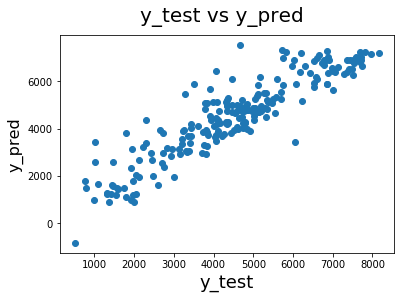

In [84]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0, 0.5, 'Cnt')

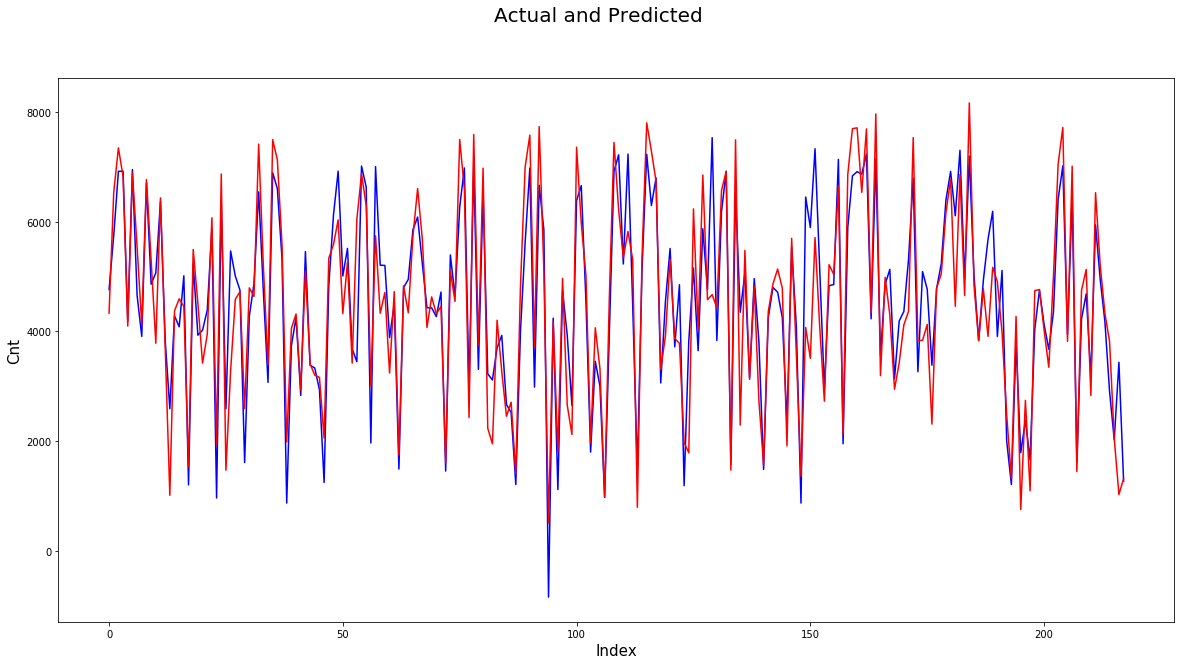

In [85]:
#Actual vs Predicted for first 100 rows for clear visibility
c = [i for i in range(len(y_test.index))]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test_pred, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_test, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=15)                               # X-label
plt.ylabel('Cnt', fontsize=15)

Text(0, 0.5, 'Cnt')

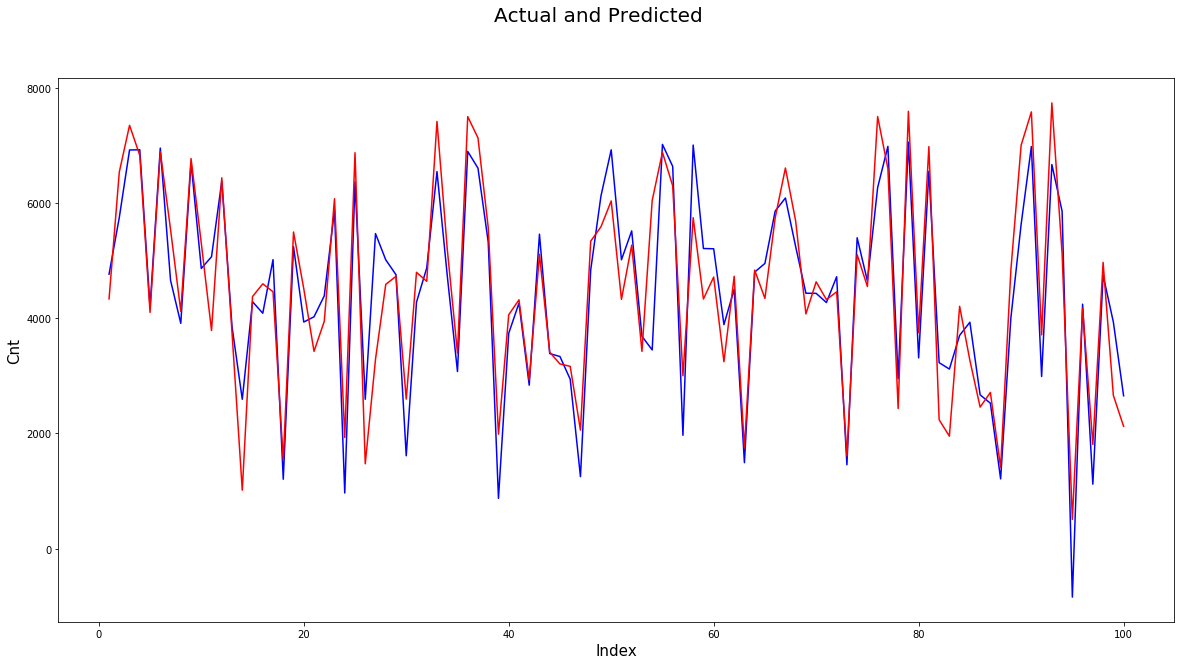

In [86]:
#Actual vs Predicted for first 100 rows for clear visibility
c = [i for i in range(1,101)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test_pred[:100], color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_test[:100], color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=15)                               # X-label
plt.ylabel('Cnt', fontsize=15)

Text(0, 0.5, 'ActualCount-PredictedCount')

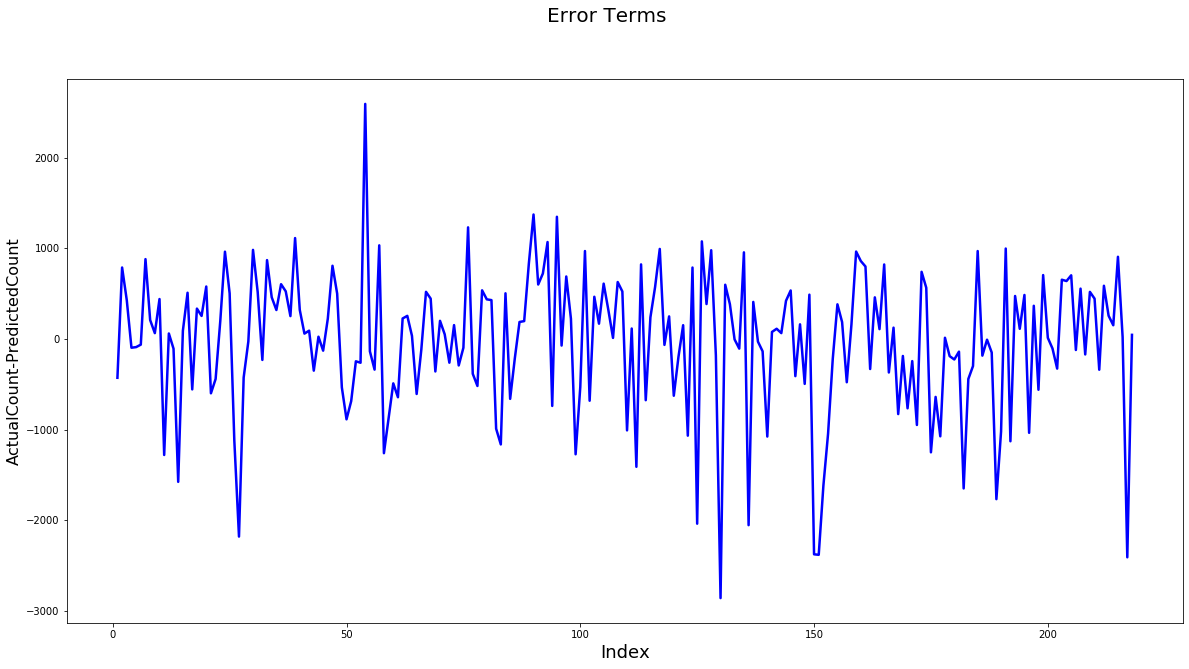

In [87]:
# Error terms
c = [i for i in range(1,len(y_test)+1)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test-y_test_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ActualCount-PredictedCount', fontsize=16)          

Text(0.5, 0, 'Errors')

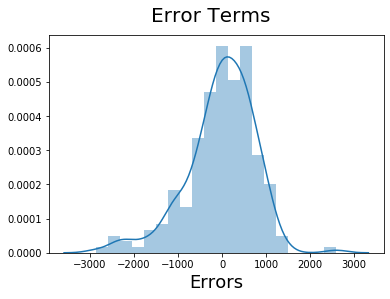

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test -y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Calculating rsquared and mean_squared_error

In [89]:
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print(mse)
print(r_squared)

601352.1582320185
0.8172132974466884


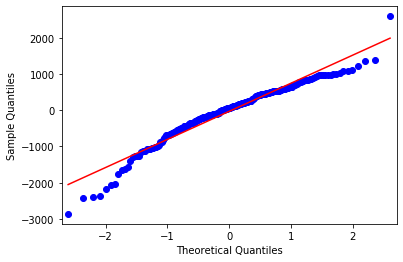

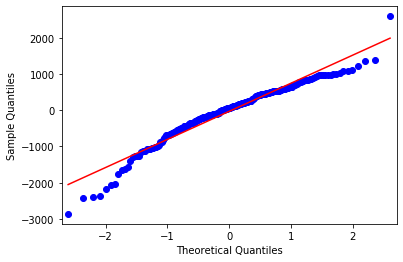

In [90]:
qqplot(y_test-y_test_pred, line='s') #qq plot